## Forced Oscillator - DifferentialEquations.jl approach

### Packages

In [174]:
import Pkg
Pkg.add("Symbolics")
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("DifferentialEquations")
Pkg.add("ModelingToolkit")
Pkg.add("Measures")
Pkg.add("PlotThemes")
Pkg.add("CurveFit")
Pkg.add("EasyModelAnalysis")
Pkg.add("ChaosTools")

using Symbolics, Plots, DifferentialEquations, ModelingToolkit, LaTeXStrings, Measures, EasyModelAnalysis, CurveFit, ChaosTools

### System definition

In [135]:
@variables t x(t) y(t) A(t) B(t) z(t) #x for entire problem, y for the linear problem, A, B and z for comparison
@parameters F, ω
d = Differential(t)

(::Differential) (generic function with 3 methods)

In [136]:
E₁ = d(d(x)) + ω^2*sin(x) #Full system
E₂ = d(d(y)) + y*ω^2 #Linearised system

E₁₁ = Symbolics.solve_for(E₁ ~ ω^2*F*cos(ω*t), d(d(x)))
E₂₂ = Symbolics.solve_for(E₂ ~ ω^2*F*cos(ω*t), d(d(y)))

F*(ω^2)*cos(t*ω) - (ω^2)*y(t)

In [137]:
#Define model for full system
system = [d(d(x)) ~ E₁₁]

@named model = ODESystem(system, t, [x], [F, ω])
model = structural_simplify(model)

#Define model for linearised system
system2 = [d(d(y)) ~ E₂₂]

@named model2 = ODESystem(system2, t, [y], [F, ω])
model2 = structural_simplify(model2)

Model model2 with 2 equations
States (2):
  yˍt(t)
  y(t)
Parameters (2):
  F
  ω
Incidence matrix:2×4 SparseArrays.SparseMatrixCSC{Num, Int64} with 4 stored entries:
 ⋅  ×  ×  ⋅
 ×  ⋅  ⋅  ×

### Differential equation setup and solution

In [175]:
u_1 = [d(x) => 1e-4
          x => 0] # initial displacement is 0 and initial velocity negligible for external factors

u_2 = [d(y) => 1e-4
          y => 0] # initial displacement is 0 and initial velocity negligible for external factors

q = [ω => 1
     F => 0.25] # ω = 1 takes care of the dimensionless case

tspan = (0.0, 200) #total time of evolution 

(0.0, 200)

In [176]:
#Whole system solution
prob = ODEProblem(model, u_1, tspan, q, abstol = 1e-8, reltol = 1e-8)
sol = solve(prob, RK4(), maxiters = 1e8)

retcode: Success
Interpolation: 3rd order Hermite
t: 8967-element Vector{Float64}:
   0.0
   0.00039999996799360357
   0.003734605321164233
   0.010034658280300786
   0.01765948086035969
   0.02777549961684518
   0.03966037291198902
   0.05362683419346357
   0.0692617169601061
   0.08651291190283669
   0.10510005828739193
   0.12486924441283562
   0.14561545651275937
   ⋮
 199.81333308379214
 199.830027126557
 199.84684562525595
 199.86379924931217
 199.8808985534464
 199.89815375082452
 199.91557441125312
 199.93316905638795
 199.95094462329826
 199.9689058012894
 199.98705425159753
 200.0
u: 8967-element Vector{Vector{Float64}}:
 [0.0001, 0.0]
 [0.00019999997866507028, 5.999999199872126e-8]
 [0.0010336462923007435, 2.1168652244638107e-6]
 [0.0026085753332229533, 1.3590033602113932e-5]
 [0.004514395696863671, 4.074598821738674e-5]
 [0.007042050752763723, 9.919959111595394e-5]
 [0.010009816571053083, 0.0002005316041656772]
 [0.013493715723700441, 0.0003646675053989041]
 [0.017387510993

In [7]:
#Linear system solution
prob2 = ODEProblem(model2, u_2, tspan, q, abstol = 1e-8, reltol = 1e-8)
sol2 = solve(prob2, RK4(), maxiters = 1e8)

retcode: Success
Interpolation: 3rd order Hermite
t: 9212-element Vector{Float64}:
   0.0
   0.0009999994999003701
   0.0061530681068082725
   0.014580390076897418
   0.024883919582418403
   0.03820730002791608
   0.053802967179810465
   0.07192268990270341
   0.09210710314931181
   0.11424255564952765
   0.13799933925760516
   0.16317354195688918
   0.18951795814253594
   ⋮
 199.79465592967324
 199.81525604015405
 199.83581319210046
 199.85633081762393
 199.87681216065755
 199.89726025127408
 199.9176779055858
 199.9380677334673
 199.95843213924573
 199.97877334234357
 199.99909338685666
 200.0
u: 9212-element Vector{Vector{Float64}}:
 [0.0001, 0.0]
 [0.0001999998666568098, 1.499998749801283e-7]
 [0.0007152971524717105, 2.5083033394488213e-6]
 [0.0015579250596866763, 1.2086999478078825e-5]
 [0.0025878474111812344, 3.3445412774305177e-5]
 [0.003918798060593025, 7.679193211605211e-5]
 [0.005474961586448555, 0.00015004584492842176]
 [0.007279613701172527, 0.00026560680481359976]
 [0.0092

### Visualisation

In [8]:
theme(:bright)

#### System behaviour

In [33]:
# Fig 1:

# Numerical solution
plot(sol, idxs = [2], tspan = (0, 200), ylim = (-11, 10), 
    lw = 1.8, c = "black", label = L"$\theta(\tau): \frac{d^{2}\theta}{d\tau^{2}} + \sin{\theta} = F\cos{\tau}$")

plot!(sol2, idxs = [2], tspan = (0, 200), lw = 1.2, label = L"$\theta(\tau): \frac{d^{2}\theta}{d\tau^{2}} + \theta = F\cos{\tau}$") 

# Specifications
plot!(title = L"F = 0.1,\ \theta_{0} = 0,\ \omega_{0} = 10^{-4}\ [rad]")
plot!(legendfontsize = 14, labelfontsize = 16, tickfontsize = 9, plot_titlefontsize = 14, legendposition = :bottomleft, legend_column = 2,
      xlabel = L"\tau", ylabel = L"\theta(\tau)", framestyle = :box, size = (1000, 600), left_margin=2.6mm,)

# Saving 
#savefig("PT1.pdf")

"C:\\Users\\shiha\\PT1.pdf"

In [12]:
# Figs 2, 11:

# Numerical solution
plot(sol, idxs = [2], tspan = (0, 23.5), ylim = (-1.2, 1.9),
     lw = 2, label = L"$θ(τ): \frac{d^{2}θ}{dτ^{2}} + \sin{θ} = F\cos{τ}$", xlabel = L"τ", ylabel = L"θ(τ)") 

# O(F) solution
plot!(sol.t, t-> 0.1*(10^-4+0.5*t)*sin(t), lw = 1.5, ls = :dash, label = L"Fθ_{0}", c = "green")

# O(F³) + O(F⁵) solution
plot!(sol.t, t-> -(0.1)^3*t^4*cos(t)/512 - (0.1)^5*t^7*sin(t)*(1/14)*(1/16384), label = L"F^{3}θ_{2} + F^{5}θ_{4}",
    ls = :dash, lw = 1.5, c = "purple")

# O(F³) + O(F⁵) + O(F⁷) solution
plot!(sol.t, t-> -(0.1)^3*t^4*cos(t)/512 - (0.1)^5*t^7*sin(t)*(1/14)*(1/16384) + (0.1)^7*t^10*cos(t)*(4.9046*10^-6)/20,
     label = L"F^{3}θ_{2} + F^{5}θ_{4} + F^{7}θ_{6}", lw = 1.5, ls = :dash, c = "orange")

# O(F⁷) solution
plot!(sol.t, t-> 0.1*(10^-4+0.5*t)*sin(t) - (0.1)^3*t^4*cos(t)/512 - (0.1)^5*t^7*sin(t)*(1/14)*(1/16384) + (0.1)^7*t^10*cos(t)*(4.9046*10^-6)/20,
    label = L"Fθ_{0} + F^{3}θ_{2} + F^{5}θ_{4} + F^{7}θ_{6}", lw = 1.8, c = "crimson")

### All coefficients are calculated and included above ###

# Specifications
plot!(title = L"F = 0.1,\ \theta_{0} = 0,\ \alpha = 10^{-4}", margin=5mm, framestyle = :box, size = (1000, 600))
plot!(legendfontsize = 12, labelfontsize = 12, tickfontsize = 8, titlefontsize = 14, legendposition = :topleft, legend_column = 2)

#Saving 
#savefig("PTorders.pdf")

# Figure 11 is derived from this as well - comment out the lower orders and plot total numerical and total O(F⁷) solution for F = 0.01, 0.001

"C:\\Users\\shiha\\PTorders.pdf"

In [36]:
# Figure 3:

# Numerical solution
plot(sol, idxs = [2], tspan = (0, 30), ylim = (-2, 4.5), 
     c = "black", ls = :dash, lw = 2, label = L"$θ(τ): \frac{d^{2}θ}{dτ^{2}} + \sin{θ} = F\cos{τ}$", xlabel = L"\tau", ylabel = L"\theta(\tau)") 

# O(F) solution
plot!(sol.t, t-> 0.1*(10^-4+0.5*t), lw = 1.5, label = L"Fp_{0}")

# O(F³) + O(F⁵) solution
plot!(sol.t, t-> -(0.1)^3*t^4*(1/512) - (0.1)^5*t^7*(1/14)*(1/16384), label = L"F^{3}p_{2} + F^{5}p_{4}", lw = 1.5, c = "purple")

# O(F⁷) solution
plot!(sol.t, t-> (0.1)^7*t^10*(4.9046*10^-6)/20, lw = 1.5, label= L"F^{7}p_{6}",c = "orange")

# O(F³) + O(F⁵) + O(F⁷) solution
plot!(sol.t, t-> -(0.1)^3*t^4*(1/512) - (0.1)^5*t^7*(1/14)*(1/16384) + (0.1)^7*t^10*(4.9046*10^-6)/20,
      label = L"F^{3}p_{2} + F^{5}p_{4} + F^{7}p_{6}", lw = 1.5, c = "teal")

# Full solution
plot!(sol.t, t-> 0.1*(10^-4+0.5*t) -(0.1)^3*t^4*(1/512) - (0.1)^5*t^7*(1/14)*(1/16384) + (0.1)^7*t^10*(4.9046*10^-6)/20,
    label = L"Fp_{0} + F^{3}p_{2} + F^{5}p_{4} + F^{7}p_{6}", lw = 1.5)

#Specifications
plot!(legendfontsize = 14, labelfontsize = 16, tickfontsize = 9, size = (1000, 600), margin=2.6mm, framestyle = :box, legendposition = :topleft, legend_column = 2)
#plot!(title = L"The forced oscillator polynomials for various orders for $F = 0.1$", plot_titlefontsize = 13)

#Saving
#savefig("PT3.pdf")

"C:\\Users\\shiha\\PT3.pdf"

#### Bounds

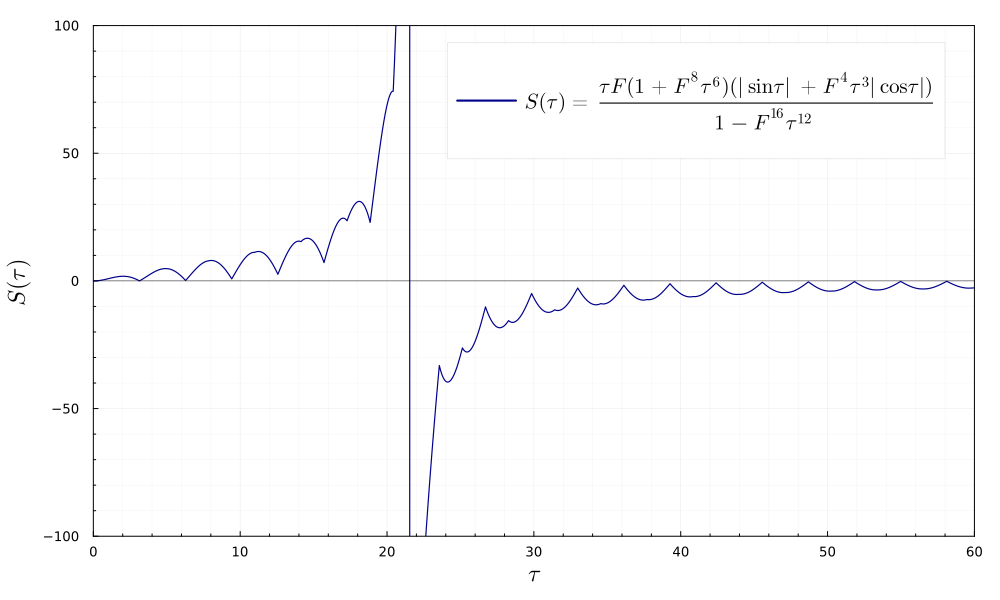

In [51]:
#For the fig in Bounds

# Specify the sum
δ = 0.1
Z = range(0, 100, length = 100000)
f = @. (Z*(1+δ^8*Z^6)*(δ^4*z^3*abs(cos(Z))+abs(sin(Z))))/(1 - δ^16*Z^12)

# Plot
plot(Z, f, size = (1000, 600), ylim = (-100,100), xlim = (0,60), lw = 1.2, xlabel = L"$\tau$", ylabel = L"$S(\tau)$", framestyle = :box, c = "dark blue",
     margin = 4.5mm, label = L"$S(\tau) = \frac{\tau F (1+F^{8}\tau^{6})(|\sin\tau|+F^{4}\tau^{3}|\cos\tau|)}{1-F^{16}\tau^{12}}$", legendfontsize = 14, 
     labelfontsize = 16, tickfontsize = 9)
hline!([0], lw = 0.5, c = "black", label = :false)

# Saving
#savefig("PTbound.pdf")

### Scaling behaviour

In [162]:
theme(:vibrant)

#### Maximum amplitude

In [163]:
max = 327 # for F upto ~0.33
T = Array{Float64}(undef, max) # Define appropriate arrays to store data points
V = Array{Float64}(undef, max)
J = Array{Float64}(undef, max)

for i in 1:max
    J[i] = 0.001 + (i-1)*0.001 # Specification of the F distribution
end

for i in 1:max 
    PRP = ODEProblem(model, u_1, (0, 800), [ω => 1, F => J[i]], abstol = 1e-9, reltol = 1e-9) # Solve system for each F 
    SOL = solve(PRP, AutoVern9(Rodas4()), maxiters = 1e8)
    T[i], V[i] = get_max_t(PRP, 2) # Store the maximum amplitude 
end

fit = curve_fit(PowerFit, J, V) # Fit the data points to a power law

PowerFit{Float64}((3.597271952647866, 0.3636786549081052))

In [173]:
# Visualisation of the data points gathered

X = range(0.001, 0.33, length = 5000) # an appropriate x-axis range

Y_exp = @. X^(1/3)*(2^(1/3)) # Expected behaviour
Y_exp1 = @. X^(1/3)*3.6 # Comparing
Y_0 = fit.(X) # Curve fitted to data points

# Plot
plot(J, V, xlabel = L"F", label = "Data", framestyle = :box,  ylabel = "Maximum Amplitude", lw = 1.5) # Plot data points
plot!(X, Y_0, label = L"Fit: $3.6F^{0.36}$", ls = :dash, lw = 1.2) # Plot fitted curve
plot!(X, Y_exp, label = L"Calculated: $(2F)^{1/3}$", ls = :dash, lw = 1.2, c = "purple") # Plot expected curve
plot!(X, Y_exp1, label = L"$3.6F^{1/3}$", ls = :dash, lw = 1.2, c = "crimson") # Plot expected curve

# Specifications
plot!(legendposition = :bottomright, legendfontsize = 10, labelfontsize = 10, tickfontsize = 7, legend_column = 2, ylim = (-0.1, 2.6)) 

# Saving
#savefig("PTsc_a23.pdf")

"C:\\Users\\shiha\\PTsc_a23.pdf"

#### Time period

In [152]:
max2 = 300 # for F upto ~0.33
T2 = Array{Float64}(undef, max2)
T3 = Array{Float64}(undef, max2)
T4 = Array{Float64}(undef, max2)
V2 = Array{Float64}(undef, max2)
V3 = Array{Float64}(undef, max2)
V4 = Array{Float64}(undef, max2)
J2 = Array{Float64}(undef, max2)

for i in 1:max2
    J2[i] = 0.03 + (i-1)*0.001 # Specification of the F distribution - starts from 0.03 in this case because of issues 
                               # with get_max_t() which identifies exactly the highest ever amplitude instead of the first local maxima
end

for i in 1:max2 # Solve for each - broken up because of the issue above
    if i < 79
    PRP2 = ODEProblem(model, u_1, (0, 100), [ω => 1, F => J2[i]], abstol = 1e-9, reltol = 1e-9)
    SOL2 = solve(PRP2, AutoVern9(Rodas4()), maxiters = 1e8)
    T2[i], V2[i] = get_max_t(PRP2, 2)
    elseif (i >=79 && i<=182)
    PRP3 = ODEProblem(model, u_1, (0, 60), [ω => 1, F => J2[i]], abstol = 1e-9, reltol = 1e-9)
    SOL3 = solve(PRP3, AutoVern9(Rodas4()), maxiters = 1e8)
    T3[i], V3[i] = get_max_t(PRP3, 2)
    elseif i>182
    PRP4 = ODEProblem(model, u_1, (0, 40), [ω => 1, F => J2[i]], abstol = 1e-9, reltol = 1e-9)
    SOL4 = solve(PRP4, AutoVern9(Rodas4()), maxiters = 1e8)
    T4[i], V4[i] = get_max_t(PRP4, 2)
    end
end

# Convert to time period by multiplying the time point at which local maxima was achieved by 4
T₂ = Array{Float64}(undef, max2)
V₂ = Array{Float64}(undef, max2)
for i in 1:max2
    if i < 79
    T₂[i] = 4*T2[i]
    V₂[i] = V2[i]
    elseif (i >=79 && i<=182)
    T₂[i] = 4*T3[i]
    V₂[i] = V3[i]
    elseif i>182
    T₂[i] = 4*T4[i]
    V₂[i] = V4[i]
    end
end

fit = curve_fit(PowerFit, J2, T₂) # fit the data points to a power law

PowerFit{Float64}((26.397306165777167, -0.7159749281116707))

In [154]:
# Visualisation

L = range(0.03, 0.33, length = 5000) # appropriate x-axis range

Y_exp2 = @. L^(-2/3)*((8π)/√3) # Expected behaviour
Y_02 = fit.(L) # Fitted curve

plot(J2, T₂, xlabel = L"F", label = "Data", framestyle = :box,  ylabel = "Time period", lw = 1.5) # Plot data points
plot!(L, Y_02, label = L"Fit: $26.4F^{-0.72}$", ls = :dash, lw = 1) # Plot fitted curve
plot!(L, Y_exp2, label = L"Calculated: $\frac{8\pi}{\sqrt{3}}F^{-2/3}$", ls = :dash, lw = 1, c = "purple") # Plot expected curve

# Specifications
plot!(legendposition = :topright, legendfontsize = 10, labelfontsize = 10, tickfontsize = 7, ylim = (25, 330))

# Saving
#savefig("PTsc_T.pdf")

"C:\\Users\\shiha\\PTsc_T.pdf"

### Comparison: Eqns. 28, 46, 47

#### Setting up the equations and problem

In [155]:
E₁₃ = d(d(z)) + z - (z^3)/6 + (z^5)/120 # Eqn 28
E₁₄ = d(A) + (B/16)*(A^2 + B^2) - (B/384)*(A^2 + B^2)^2 # Eqn 46
E₁₅ = d(B) - (A/16)*(A^2 + B^2) + (A/384)*(A^2 + B^2)^2 - F/2 # Eqn 47

E₁₁₃ = Symbolics.solve_for(E₁₃ ~ F*cos(t), d(d(z)))
E₁₁₄ = Symbolics.solve_for(E₁₄ ~ 0, d(A))
E₁₁₅ = Symbolics.solve_for(E₁₅ ~ 0, d(B))

(1//2)*F + (1//16)*(A(t)^2 + B(t)^2)*A(t) - (1//384)*((A(t)^2 + B(t)^2)^2)*A(t)

In [156]:
#Define model for the equations
sys_eqn = [d(d(z)) ~ E₁₁₃,
           d(A) ~ E₁₁₄,
           d(B) ~ E₁₁₅]

@named model_eqn = ODESystem(sys_eqn, t, [z, A, B], [F])
model_eqn = structural_simplify(model_eqn)

Model model_eqn with 4 equations
States (4):
  zˍt(t)
  A(t)
  B(t)
  z(t)
Parameters (1):
  F
Incidence matrix:4×8 SparseArrays.SparseMatrixCSC{Num, Int64} with 10 stored entries:
 ⋅  ⋅  ⋅  ×  ×  ⋅  ⋅  ⋅
 ⋅  ×  ×  ⋅  ⋅  ⋅  ×  ⋅
 ⋅  ×  ×  ⋅  ⋅  ⋅  ⋅  ×
 ×  ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅

In [157]:
u_eqn = [d(z) => 1e-4
          z => 0
          A => 0
          B => 1e-4] # initial displacement is 0 and initial velocity negligible for external factors

q_eqn = [F => 0.1] # ω = 1 takes care of the dimensionless case

tspan = (0.0, 200) #total time of evolution 

(0.0, 200)

In [158]:
prob_eqn = ODEProblem(model_eqn, u_eqn, tspan, q_eqn, abstol = 1e-9, reltol = 1e-9)
sol_eqn = solve(prob_eqn, AutoVern9(Rodas4()), maxiters = 1e8)

retcode: Success
Interpolation: specialized 9th order lazy interpolation, specialized 3rd order "free" stiffness-aware interpolation
t: 468-element Vector{Float64}:
   0.0
   0.0012649105580020317
   0.006377792335652771
   0.024421286064585122
   0.08406304330102962
   0.26556133049890274
   0.5530903934793386
   0.8736828944967354
   1.2161945722371543
   1.5795646150487173
   1.9587341100260887
   2.3521510756169173
   2.7588095650791225
   ⋮
 195.30057705094185
 195.76502723308008
 196.23953249964106
 196.69087286967343
 197.14850229077067
 197.62603675484
 198.0646239365658
 198.51671389262896
 198.99596958677103
 199.4697835617144
 199.92790775640563
 200.0
u: 468-element Vector{Vector{Float64}}:
 [0.0001, 0.0, 0.0001, 0.0]
 [0.0002264909083384435, -1.9067958035278045e-16, 0.0001632455279001016, 2.064909367232377e-7]
 [0.0007377685523007878, -9.590374443583368e-15, 0.0004188896167826386, 2.6715728757271684e-6]
 [0.0025416133151692803, -9.517690357261824e-13, 0.0013210643032292562

#### Visualisation

In [ ]:
## idxs: 1: dz, 2: A, 3: B, 4: z

In [160]:
Θ(t, x, y) = (t, x*cos(t) + y*sin(t))
plot(sol_eqn, idxs = (Θ, 0, 2, 3), label = L"A(\tau)\cos \tau + B(\tau)\sin \tau", lw = 1.2)
plot!(sol_eqn, idxs = [4], label = L"$\theta(\tau): 5^{th}$ power truncation", ls = :dash, lw = 1.5)
plot!(legendfontsize = 14, labelfontsize = 25, tickfontsize = 9, legendposition = :bottomright,
      xlabel = L"\tau", framestyle = :box, size = (1000, 600))
#savefig("PT_comparison.pdf")

"C:\\Users\\shiha\\PT_comparison.pdf"